In [16]:
import matplotlib.pyplot as plt
import osmnx as ox

ox.__version__

'2.0.1'

In [44]:
# 获取地点边界
place = "Baltimore, Maryland, USA"
place2 = "Maryland, USA"
place3 = "Baltimore county, Maryland, USA"
place4 = ["Baltimore county, Maryland, USA", "Baltimore, Maryland, USA"]
gdf = ox.geocoder.geocode_to_gdf(place)

# 获取街道网络，设置retain_all=True以保留所有断开连接的岛屿网络
# G = ox.graph.graph_from_place(place, network_type="drive", retain_all=True)

In [29]:
# 仅获取高速公路
cf = '["highway"~"motorway"]'
G57 = ox.graph.graph_from_place(place, network_type="drive", custom_filter=cf)




d:\Python\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 21 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


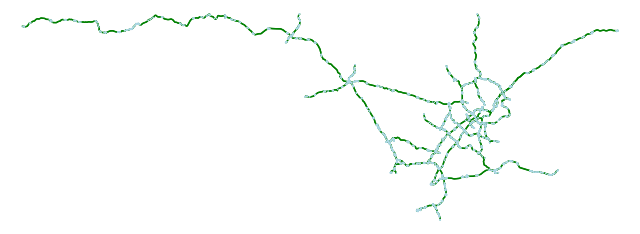

4640 motorway


In [31]:
fig, ax = ox.plot.plot_graph(G57, node_size= 1, node_color='lightblue', bgcolor='w',edge_color='g',edge_linewidth=1)
print(len(G57), "motorway")

In [55]:
place = "Baltimore, Maryland, USA"
place2 = "Maryland, USA"
place3 = "Baltimore county, Maryland, USA"
place4 = ["Baltimore county, Maryland, USA", "Baltimore, Maryland, USA"]

# 使用管道符 (|) 作为“或”运算符
cf4 = '["highway"~"motorway|primary|secondary"]'
cf5 = '["highway"~"motorway|primary"]'
#G44 = ox.graph.graph_from_place(place4, network_type="drive", custom_filter=cf4)
G45 = ox.graph.graph_from_place(place4, network_type="drive", custom_filter=cf5)

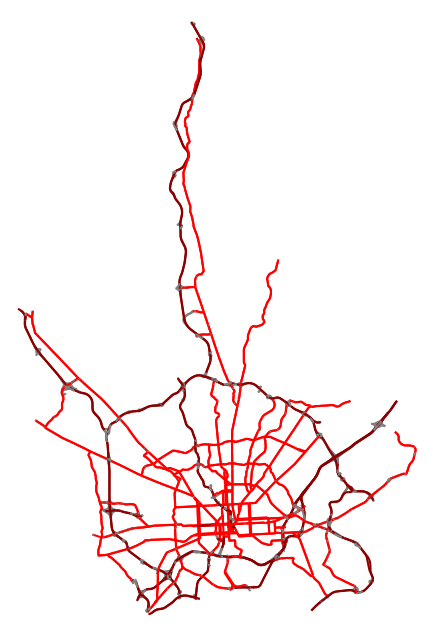

In [57]:
# 获取边的颜色列表
edge_colors = []
for u, v, data in G45.edges(data=True):
    if data["highway"] == "motorway":
        edge_colors.append("darkred")  # 高速公路用红色
    elif data["highway"] == "primary":
        edge_colors.append("red")  # 主要道路用蓝色
    elif data["highway"] == "secondary":
        edge_colors.append("w")
    else:
        edge_colors.append("gray")  # 其他道路用灰色

# 绘制图形
fig, ax = ox.plot.plot_graph(
    G45,
    node_size=0,  # 不显示节点
    edge_color=edge_colors,  # 使用自定义颜色
    edge_linewidth=1.5,  # 设置边线宽度
    bgcolor="w",  # 背景颜色为白色
    show=False,  # 不立即显示
    close=False,  # 不关闭图形
)

# 显示图形
plt.show()

# 分析断桥影响
## 1.baltimore及周围的高速公路

In [60]:
place5_around = ["Baltimore county, Maryland, USA", "Baltimore, Maryland, USA",
                 "Anne Arundel, Maryland, USA", "Harford, Maryland, USA", "Howard, Maryland, USA"]
# 自定义过滤器：查询高速公路和主要道路
cf6 = '["highway"~"motorway"]'
G56 = ox.graph.graph_from_place(place5_around, network_type="drive", custom_filter=cf6)



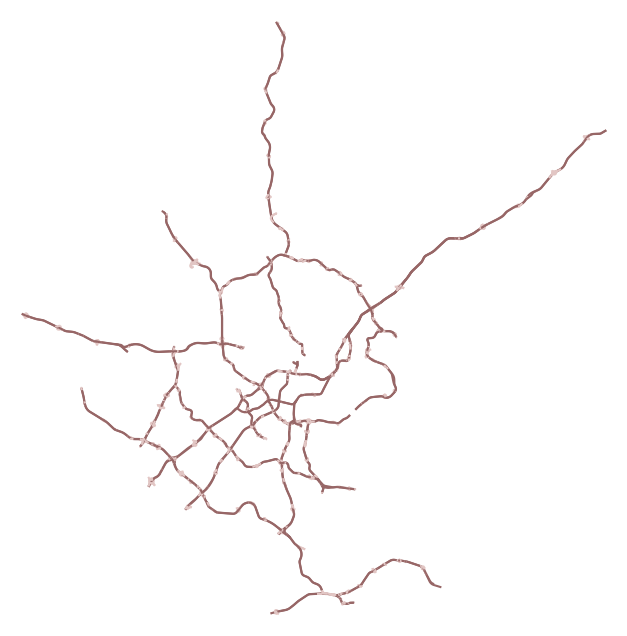

In [64]:
# 获取边的颜色列表
edge_colors = []
for u, v, data in G56.edges(data=True):
    if data["highway"] == "motorway":
        edge_colors.append("#976666")  # 高速公路用红色
    elif data["highway"] == "primary":#A08887
        edge_colors.append("")  # 主要道路用蓝色
    elif data["highway"] == "secondary":
        edge_colors.append("#DDD0C8")
    else:
        edge_colors.append("#E2C6C4")  # 其他道路用灰色

# 绘制图形
fig, ax = ox.plot.plot_graph(
    G56,
    node_size=0,  # 不显示节点
    edge_color=edge_colors,  # 使用自定义颜色
    edge_linewidth=1.5,  # 设置边线宽度
    bgcolor="w",  # 背景颜色为白色
    show=False,  # 不立即显示
    close=False,  # 不关闭图形
)

# 显示图形
plt.show()

In [ ]:
# for data in G56.nodes(data=True):
#     print(data)

## 2.高速公路+主干道

In [119]:
place5_around = ["Baltimore county, Maryland, USA", "Baltimore, Maryland, USA",
                 "Anne Arundel, Maryland, USA", "Harford, Maryland, USA", "Howard, Maryland, USA"]
# 自定义过滤器：查询高速公路和主要道路
cf7 = '["highway"~"motorway|primary|motorway_link"]'
G57 = ox.graph.graph_from_place(place5_around, network_type="drive", custom_filter=cf7)


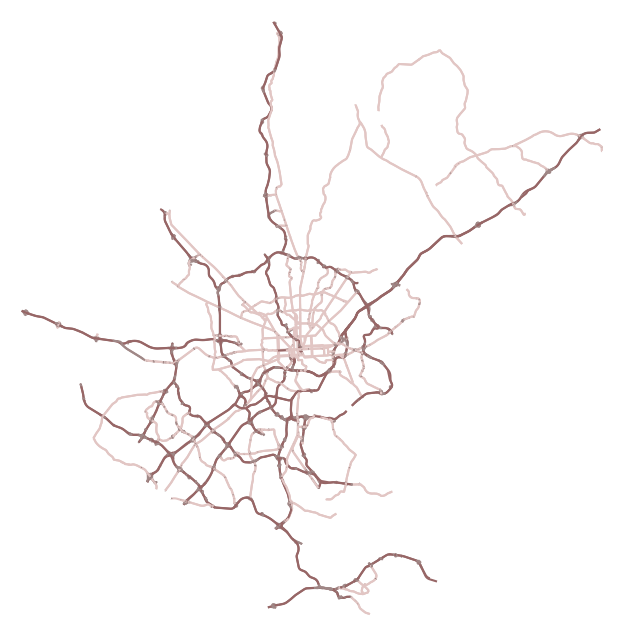

In [120]:
# 获取边的颜色列表
edge_colors = []
for u, v, data in G57.edges(data=True):
    if data["highway"] == "motorway":
        edge_colors.append("#976666")  # 高速公路用红色
    elif data["highway"] == "primary":
        edge_colors.append("#E2C6C4")  # 主要道路用蓝色
    elif data["highway"] == "secondary":
        edge_colors.append("#DDD0C8")
    else:
        edge_colors.append("#A08887")  # 其他道路用灰色

# 绘制图形
fig, ax = ox.plot.plot_graph(
    G57,
    node_size=0,  # 不显示节点
    edge_color=edge_colors,  # 使用自定义颜色
    edge_linewidth=1.5,  # 设置边线宽度
    bgcolor="w",  # 背景颜色为白色
    show=False,  # 不立即显示
    close=False,  # 不关闭图形
)

# 显示图形
#plt.legend()
# plt.show()

In [80]:
import osmnx as ox
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('choosenode for bridge.csv')

# 分离前10个点为起点，后10个点为终点
origins = df.iloc[:10]
destinations = df.iloc[10:]

# 假设图G已加载，获取最近节点
orig_nodes = [ox.distance.nearest_nodes(G57, X=row['longitude'], Y=row['latitude']) for _, row in origins.iterrows()]
dest_nodes = [ox.distance.nearest_nodes(G57, X=row['longitude'], Y=row['latitude']) for _, row in destinations.iterrows()]

# 初始化矩阵存储时间和非直线系数
time_matrix = np.full((10, 10), np.nan)
coeff_matrix = np.full((10, 10), np.nan)

In [125]:
# 估算缺失的路速度并使用速度模块计算边旅行时间
G57 = ox.routing.add_edge_speeds(G57)
G57 = ox.routing.add_edge_travel_times(G57)

In [149]:
for i in range(10):
    dest = orig_nodes[i]
    for j in range(10):
        orig = dest_nodes[j]
        try:
            # 计算最短路径
            new_var = G57
            route = ox.shortest_path(new_var, orig, dest, weight="travel_time")
            if not route:
                continue  # 路径不存在则跳过

            # 使用 ox.routing.route_to_gdf 获取路径属性
            route_gdf = ox.routing.route_to_gdf(G57, route)
            length_total = route_gdf["length"].sum()
            time_total = route_gdf["travel_time"].sum()

            # 计算直线距离
            orig_y, orig_x = G57.nodes[orig]["y"], G57.nodes[orig]["x"]
            dest_y, dest_x = G57.nodes[dest]["y"], G57.nodes[dest]["x"]
            straight_dist = ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x)

            # 计算非直线系数
            coeff = length_total / straight_dist if straight_dist > 0 else np.nan

            # 填充矩阵
            time_matrix[i, j] = time_total
            coeff_matrix[i, j] = coeff
        except Exception as e:
            print(f"Error processing O-D pair ({orig}, {dest}): {e}")


In [150]:
# 转换为DataFrame并保存到Excel
time_df = pd.DataFrame(time_matrix, index=origins['osmid'], columns=destinations['osmid'])
coeff_df = pd.DataFrame(coeff_matrix, index=origins['osmid'], columns=destinations['osmid'])

with pd.ExcelWriter('od_matrices.xlsx') as writer:
    time_df.to_excel(writer, sheet_name='Travel Time (seconds)')
    coeff_df.to_excel(writer, sheet_name='Detour Coefficient')

In [138]:
import osmnx as ox

# 假设起点和终点的坐标
start_point = (39.202141, -76.557790)  
end_point = (39.232730, -76.506635)    

# 查找最近节点
u = ox.distance.nearest_nodes(G57, X=start_point[1], Y=start_point[0])
v = ox.distance.nearest_nodes(G57, X=end_point[1], Y=end_point[0])

from shapely.geometry import LineString

# 计算长度（假设为直线距离，实际中可能需要更精确的方法）
start_node = G57.nodes[u]
end_node = G57.nodes[v]
line = LineString([(start_node['x'], start_node['y']), (end_node['x'], end_node['y'])])
length = ox.distance.great_circle(line.coords[0][1], line.coords[0][0], line.coords[1][1], line.coords[1][0])

edge_attrs = {
    'highway': 'motorway',
    'length': 600,
    'geometry': line,
    'maxspeed': '55 mph',
    'travel_time':0
}

In [139]:
import networkx as nx
G57_new = G57.copy()
G57_new.add_edge(v, u, **edge_attrs)
G57_new.add_edge(u, v, **edge_attrs)
#G57_new = nx.to_undirected(G57_new)
# 估算缺失的路速度并使用速度模块计算边旅行时间
G57 = ox.routing.add_edge_speeds(G57)
G57 = ox.routing.add_edge_travel_times(G57)

In [ ]:
fig, ax = ox.plot.plot_graph(
    G57_new,
    node_size=0,  # 不显示节点
    edge_color='black',  # 使用自定义颜色
    edge_linewidth=1.5,  # 设置边线宽度
    bgcolor="w",  # 背景颜色为白色
    show=False,  # 不立即显示
    close=True,  # 不关闭图形
)

# 估算缺失的路速度并使用速度模块计算边旅行时间
# G57_new = ox.routing.add_edge_speeds(G57_new)
# G57_new = ox.routing.add_edge_travel_times(G57_new)

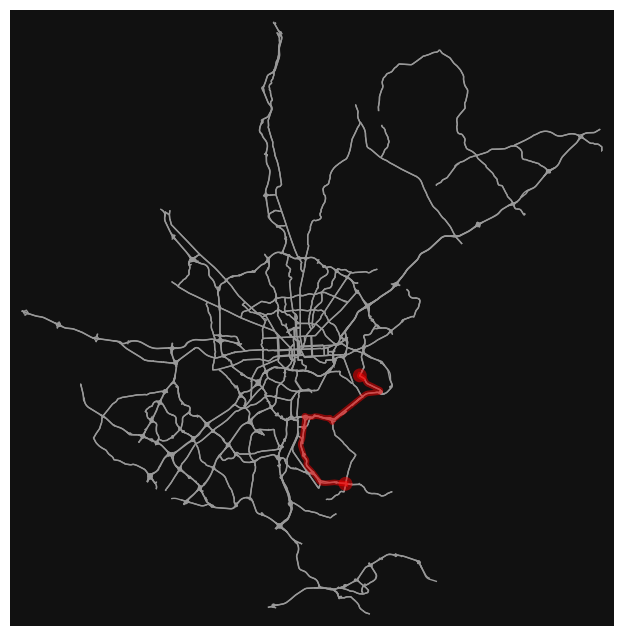

In [146]:
for i in range(10):
    dest= orig_nodes[i]
    for j in range(10):
        orig = dest_nodes[j]
        try:
            # 计算最短路径
            new_var = G57_new
            route = ox.shortest_path(new_var, orig, dest, weight="travel_time")
            if not route:
                continue  # 路径不存在则跳过

            # 使用 ox.routing.route_to_gdf 获取路径属性
            route_gdf = ox.routing.route_to_gdf(G57_new, route)
            length_total = route_gdf["length"].sum()
            time_total = route_gdf["travel_time"].sum()

            # 计算直线距离
            orig_y, orig_x = G57_new.nodes[orig]["y"], G57_new.nodes[orig]["x"]
            dest_y, dest_x = G57_new.nodes[dest]["y"], G57_new.nodes[dest]["x"]
            straight_dist = ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x)

            # 计算非直线系数
            coeff = length_total / straight_dist if straight_dist > 0 else np.nan

            # 填充矩阵
            time_matrix[i, j] = time_total
            coeff_matrix[i, j] = coeff
        except Exception as e:
            print(f"Error processing O-D pair ({orig}, {dest}): {e}")

        if i == 3 and j == 8:
            fig, ax = ox.plot.plot_graph_route(G57_new, route, node_size=0)

In [148]:
# 转换为DataFrame并保存到Excel
time_df = pd.DataFrame(time_matrix, index=origins['osmid'], columns=destinations['osmid'])
coeff_df = pd.DataFrame(coeff_matrix, index=origins['osmid'], columns=destinations['osmid'])

with pd.ExcelWriter('od_matrices2.xlsx') as writer:
    time_df.to_excel(writer, sheet_name='Travel Time (seconds)')
    coeff_df.to_excel(writer, sheet_name='Detour Coefficient')